# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [30]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_url = query_url + cities[0]
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': -79.2353, 'lat': 42.097},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 55.26,
  'feels_like': 53.78,
  'temp_min': 49.55,
  'temp_max': 60.44,
  'pressure': 1014,
  'humidity': 70},
 'visibility': 10000,
 'wind': {'speed': 0, 'deg': 0},
 'clouds': {'all': 0},
 'dt': 1681453308,
 'sys': {'type': 2,
  'id': 2008828,
  'country': 'US',
  'sunrise': 1681468687,
  'sunset': 1681516557},
 'timezone': -14400,
 'id': 5122534,
 'name': 'Jamestown',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [31]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lng = city_weather['coord']['lon']
        city_lat = city_weather['coord']['lat']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | ambovombe
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | padang
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | ternate
Processing Record 7 of Set 1 | pathein
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | pangnirtung
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | clyde river
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | rungata
City not found. Skipping...
Processing Record 16 of Set 1 | markova
Processing Record 17 of Set 1 | cukai
Processing Record 18 of Set 1 | oranjemund
Processing Record 19 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 20 of Set 1 | hambantota
Processing Record 21 of Set 1 | aksum
Processing Record 22 of Set 1 | mataur

Processing Record 40 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 41 of Set 4 | rachitoasa
Processing Record 42 of Set 4 | benguela
Processing Record 43 of Set 4 | sorland
Processing Record 44 of Set 4 | filingue
Processing Record 45 of Set 4 | portland
Processing Record 46 of Set 4 | dunedin
Processing Record 47 of Set 4 | kaitangata
Processing Record 48 of Set 4 | bambous virieux
Processing Record 49 of Set 4 | namatanai
Processing Record 0 of Set 5 | davis
Processing Record 1 of Set 5 | dalby
Processing Record 2 of Set 5 | faanui
Processing Record 3 of Set 5 | marawi
Processing Record 4 of Set 5 | iqaluit
Processing Record 5 of Set 5 | cape town
Processing Record 6 of Set 5 | sinjar
Processing Record 7 of Set 5 | port keats
Processing Record 8 of Set 5 | berlevag
Processing Record 9 of Set 5 | coahuayana
Processing Record 10 of Set 5 | celestun
Processing Record 11 of Set 5 | the valley
Processing Record 12 of Set 5 | boke
Processing Record 13 of Set 5 | talnakh

Processing Record 29 of Set 8 | santa cruz
Processing Record 30 of Set 8 | colares
Processing Record 31 of Set 8 | amderma
City not found. Skipping...
Processing Record 32 of Set 8 | yaan
Processing Record 33 of Set 8 | nara
Processing Record 34 of Set 8 | zhigansk
Processing Record 35 of Set 8 | ararangua
Processing Record 36 of Set 8 | san patricio
Processing Record 37 of Set 8 | dikson
Processing Record 38 of Set 8 | nata
Processing Record 39 of Set 8 | abalak
Processing Record 40 of Set 8 | alac
Processing Record 41 of Set 8 | kahama
Processing Record 42 of Set 8 | marshall
Processing Record 43 of Set 8 | sterling
Processing Record 44 of Set 8 | bacuit
City not found. Skipping...
Processing Record 45 of Set 8 | parakou
Processing Record 46 of Set 8 | manado
Processing Record 47 of Set 8 | port-cartier
Processing Record 48 of Set 8 | aswan
Processing Record 49 of Set 8 | verkhoyansk
Processing Record 0 of Set 9 | nizwa
Processing Record 1 of Set 9 | khoy
Processing Record 2 of Set 9

City not found. Skipping...
Processing Record 21 of Set 12 | buriti alegre
Processing Record 22 of Set 12 | qaqortoq
Processing Record 23 of Set 12 | altay
Processing Record 24 of Set 12 | novoilinskiy
City not found. Skipping...
Processing Record 25 of Set 12 | colesberg
Processing Record 26 of Set 12 | yar-sale
Processing Record 27 of Set 12 | thanyaburi
Processing Record 28 of Set 12 | omaruru
Processing Record 29 of Set 12 | saint george
Processing Record 30 of Set 12 | quesnel
Processing Record 31 of Set 12 | teeli
Processing Record 32 of Set 12 | okhotsk
Processing Record 33 of Set 12 | hualmay
Processing Record 34 of Set 12 | ailigandi
-----------------------------
Data Retrieval Complete      
-----------------------------


In [32]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [33]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,airai,-8.9266,125.4092,72.07,74,39,3.09,TL,1681453354
1,ambovombe,-25.1667,46.0833,79.61,65,0,5.82,MG,1681453911
2,rikitea,-23.1203,-134.9692,75.99,80,100,20.22,PF,1681453313
3,padang,-0.9492,100.3543,87.85,66,97,6.89,ID,1681453155
4,jamestown,42.0970,-79.2353,60.44,70,0,0.00,US,1681453912


In [34]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [35]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,airai,-8.9266,125.4092,72.07,74,39,3.09,TL,1681453354
1,ambovombe,-25.1667,46.0833,79.61,65,0,5.82,MG,1681453911
2,rikitea,-23.1203,-134.9692,75.99,80,100,20.22,PF,1681453313
3,padang,-0.9492,100.3543,87.85,66,97,6.89,ID,1681453155
4,jamestown,42.0970,-79.2353,60.44,70,0,0.00,US,1681453912


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

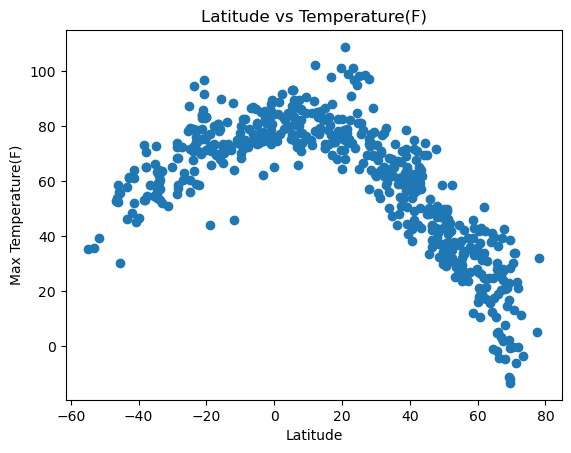

In [15]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title("Latitude vs Temperature(F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

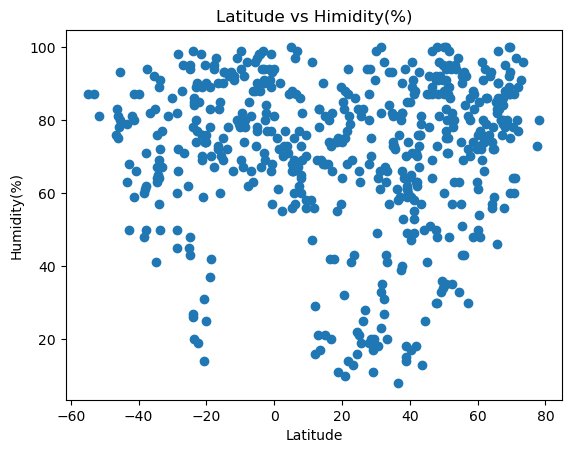

In [16]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("Latitude vs Himidity(%)")

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

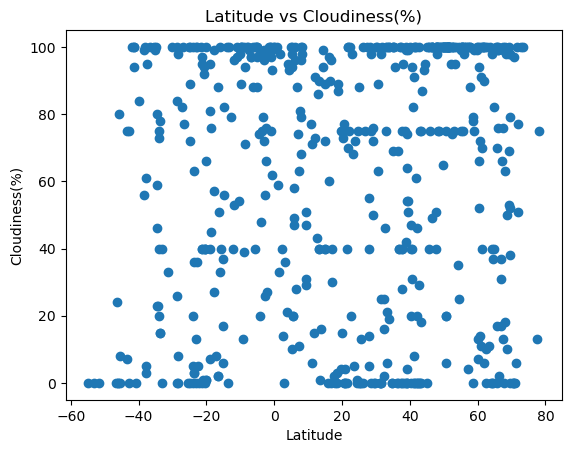

In [17]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("Latitude vs Cloudiness(%)")

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

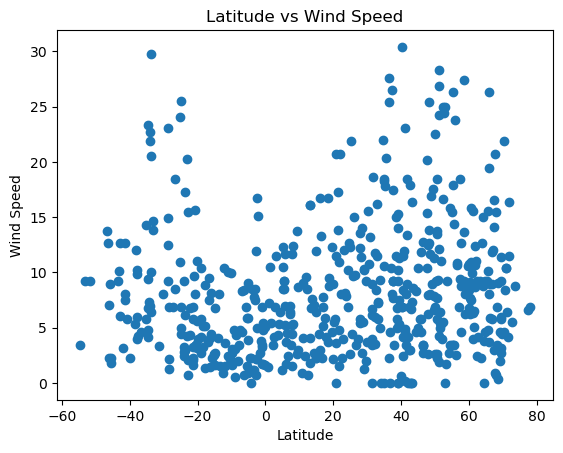

In [18]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots


In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =  city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,60.44,70,0,0.00,US,1681453308
2,ginir,7.1333,40.7000,65.62,67,74,6.40,ET,1681453312
3,chokurdakh,70.6333,147.9167,13.26,87,97,8.39,RU,1681453313
6,ribeira grande,38.5167,-28.7000,63.00,94,75,15.01,PT,1681453313
10,osa,57.2829,55.4567,26.44,30,4,18.41,RU,1681453315


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =  city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,35.26,87,0,3.44,AR,1681453312
4,arraial do cabo,-22.9661,-42.0278,74.32,89,13,4.23,BR,1681453313
5,rikitea,-23.1203,-134.9692,75.99,80,100,20.22,PF,1681453313
7,bambous virieux,-20.3428,57.7575,83.21,74,40,3.44,MU,1681453314
8,chuy,-33.6971,-53.4616,52.99,72,15,6.38,UY,1681453314


###  Temperature vs. Latitude Linear Regression Plot

Text(5.8, 0.8, 'y = -1.13x + 98.59')

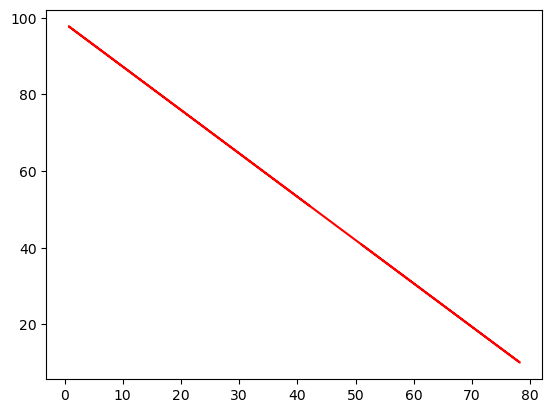

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

Text(5.8, 0.8, 'y = 0.63x + 83.2')

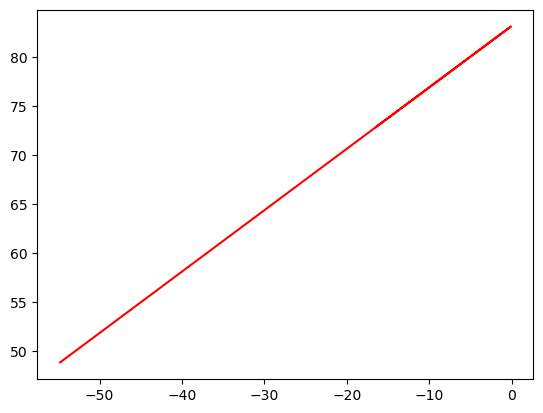

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Text(5.8, 0.8, 'y = 0.27x + 57.98')

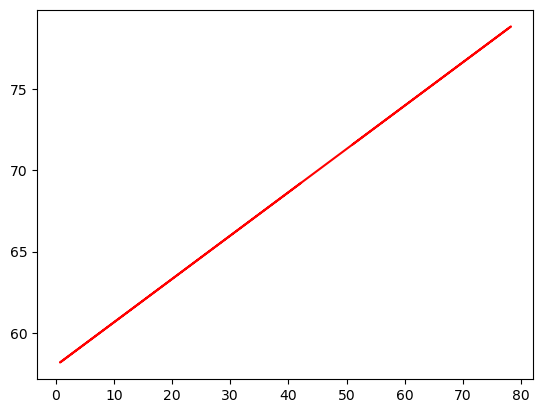

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

Text(5.8, 0.8, 'y = 0.29x + 81.84')

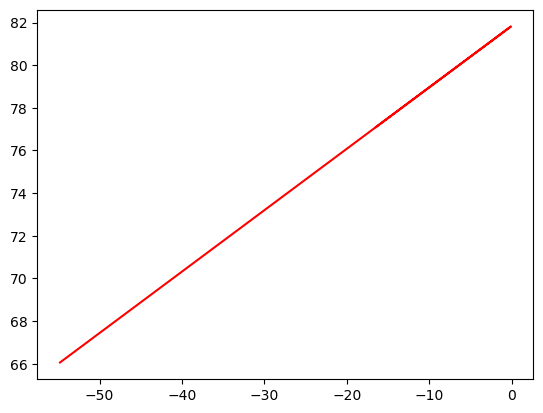

In [25]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Text(5.8, 0.8, 'y = 0.24x + 50.69')

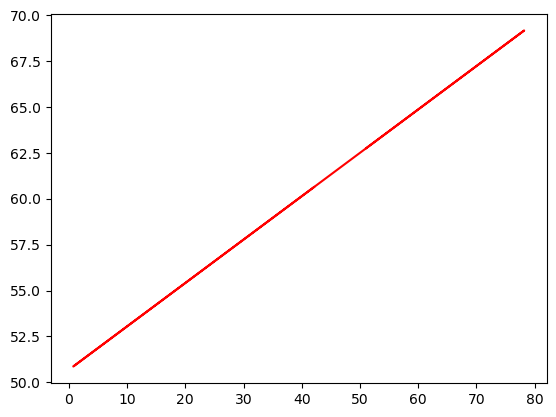

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

Text(5.8, 0.8, 'y = 1.02x + 80.59')

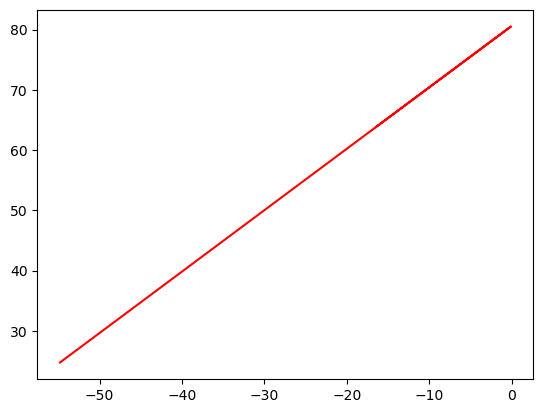

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Text(5.8, 0.8, 'y = 0.04x + 7.18')

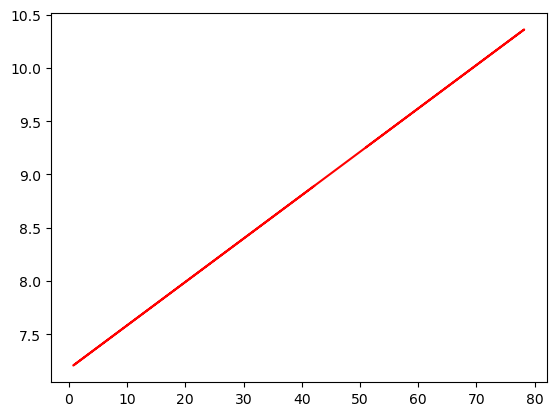

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

Text(5.8, 0.8, 'y = -0.13x + 4.06')

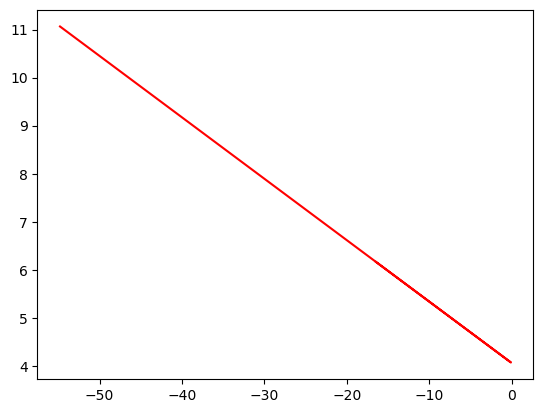

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

**Discussion about the linear relationship:** YOUR RESPONSE HERE